In [1]:
%pylab inline
random.seed(2019)

Populating the interactive namespace from numpy and matplotlib


In [2]:
a   = 7.0
b   = 12.0
sig = 2.0

x_data = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
y_data = a * x_data + b + sig*random.normal(size=size(x_data))
y_data = np.round(y_data,decimals=1)

print(y_data)

[18.6 27.6 36.  42.7 46.3 55.4]


best fit value of a:   6.494285714297698
best fit value of b:   12.420000000027086


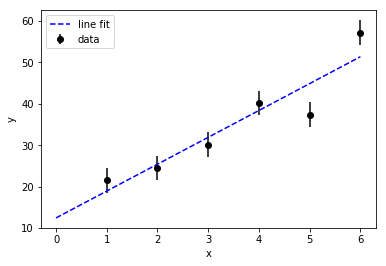

In [3]:
from scipy import optimize

# define the fitting function, in this case, a straight line:
# return y = a*x + b for parameters a and b
def line_func(x, a, b):
    return x*a+b

# fill np arrays with the data to be fit:
x_data = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
y_data = np.array([21.5, 24.5, 30.1, 40.2, 37.4, 57.2])
y_unc  = np.array([3.0, 3.0, 3.0, 3.0, 3.0, 3.0])

# plot the raw data
plt.errorbar(x_data, y_data,yerr=y_unc,fmt="ko",label="data")

# calculate best fit curve (line_func) for the x_data and y_data
# guess_a and guess_b are initial guesses for the parameter values
guess_a = 1.0
guess_b = 0.0
par, cov = optimize.curve_fit(line_func, x_data, y_data, 
                              p0=[guess_a, guess_b])
# retrieve and print the fitted values of a and b:
fit_a = par[0]
fit_b = par[1]
print("best fit value of a:  ", fit_a)
print("best fit value of b:  ", fit_b)

# plot the best fit line:
xf    = np.linspace(0.0,6.0,100)
yf    = fit_b + fit_a * xf
plt.plot(xf,yf,"b--",label="line fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()


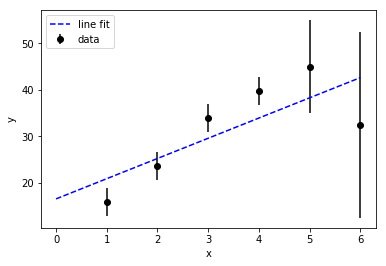

In [4]:
def line_func(x, a, b):
    return x*a+b

x_data = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
y_data = np.array([15.9, 23.6, 33.9, 39.7, 45.0, 32.4])
y_unc  = np.array([3.0, 3.0, 3.0, 3.0, 10.0, 20.0])

plt.errorbar(x_data, y_data,yerr=y_unc,fmt="ko",label="data")

guess_a = 1.0
guess_b = 0.0
par, cov = optimize.curve_fit(line_func, x_data, y_data, 
                              p0=[guess_a, guess_b])
fit_a = par[0]
fit_b = par[1]

xf    = np.linspace(0.0,6.0,100)
yf    = fit_b + fit_a * xf
plt.plot(xf,yf,"b--",label="line fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=2)
plt.savefig("bias.pdf")


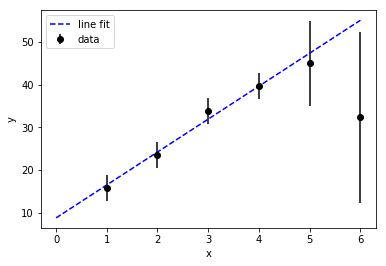

In [5]:
def line_func(x, a, b):
    return x*a+b

x_data = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
y_data = np.array([15.9, 23.6, 33.9, 39.7, 45.0, 32.4])
y_unc  = np.array([3.0, 3.0, 3.0, 3.0, 10.0, 20.0])

plt.errorbar(x_data, y_data,yerr=y_unc,fmt="ko",label="data")

guess_a = 1.0
guess_b = 0.0
par, cov = optimize.curve_fit(line_func, x_data, y_data, sigma=y_unc, p0=[guess_a, guess_b])
fit_a = par[0]
fit_b = par[1]

xf    = np.linspace(0.0,6.0,100)
yf    = fit_b + fit_a * xf
plt.plot(xf,yf,"b--",label="line fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()



In [6]:
a   = 18
w   = 2*3.1415/7.0
sig = 2.0
x_data = np.array(np.arange(0,10))
y_data = a * sin(x_data) + sig*random.normal(size=size(x_data))
y_data = np.around(y_data, decimals=1)
print(x_data)
print(y_data)

[0 1 2 3 4 5 6 7 8 9]
[  1.1  15.7  15.9   4.4 -17.  -18.   -5.   10.8  18.3   7. ]


[ 0  1  2  3  4  5  6  7  8  9 10]
[  5.3  15.   19.2   6.8  -9.7 -17.4 -20.5   2.1  15.7  18.5   8.6]
a:     19.949844270888306 +/- 1.424431066593998
w:     0.8990033540793863 +/- 9.559685419711821e-05
x:   [ 0  1  2  3  4  5  6  7  8  9 10]
y:   [  5.3  15.   19.2   6.8  -9.7 -17.4 -20.5   2.1  15.7  18.5   8.6]


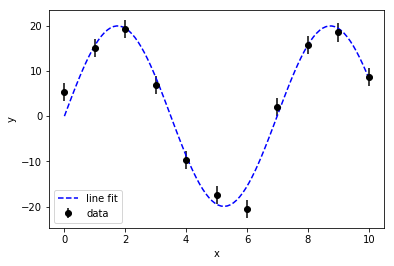

In [7]:
def sine_func(x, a, w):
    return a*np.sin(w*x)

a   = 18
w   = 2*3.1415/7.0
sig = 2.0

x_data = np.array(np.arange(0,11))
y_data = a * sin(w*x_data) + sig*random.normal(size=size(x_data))
y_data = np.around(y_data, decimals=1)
print(x_data)
print(y_data)

plt.errorbar(x_data, y_data,fmt="ko",yerr=sig,label="data")

guess_a = 10.0
guess_w = 2*3.1415/10.0
par, cov = optimize.curve_fit(sine_func, x_data, y_data, p0=[guess_a, guess_w])
fit_a   = par[0]
fit_w   = par[1]

unc = np.diagonal(cov)
unc_a   = unc[0]
unc_w   = unc[1]

print("a:    ", fit_a, "+/-", unc_a)
print("w:    ", fit_w, "+/-", unc_w)

xf    = np.linspace(0.0,10.0,100)
yf    = fit_a * np.sin(fit_w * xf)
plt.plot(xf,yf,"b--",label="line fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

print("x:  ", x_data)
print("y:  ", y_data)

In [8]:
# will fit y_data to a constant value:
def constant_func(x, a):
    return a

# choose y_data indepdent of x values, from 
#   Gaussian with a mean of 50 and sigma of 10
x_data = np.arange(100)
y_data = np.random.normal(50.0, 10.0, size=100)

# fit for the best fit constant value, should find the mean:
guess_a = 0.0
par, cov = optimize.curve_fit(constant_func, x_data, y_data, p0=[guess_a])

# determine the best fit parameter and it's uncertainty:
unc = np.sqrt(np.diag(cov))
fit_a = par[0]
unc_a = unc[0]

#print the results
print("mean of y data:  ", np.mean(y_data))
print("fitted constant: ", fit_a)
print("uncertainty:     ", unc_a)

mean of y data:   48.426944799228266
fitted constant:  48.42694479930867
uncertainty:      0.9711303089930362


In [11]:
def constant_func(x, a):
    return a

x_data = np.arange(100)
y_data = np.random.normal(10.0, 5.0, size=100)
sigma  = np.full(100, 10.0)
guess_a = 0.0

par, cov = optimize.curve_fit(constant_func, x_data, y_data, sigma=sigma, absolute_sigma=True, p0=[guess_a])
unc = np.sqrt(np.diag(cov))
fit_a = par[0]
unc_a = unc[0]

print("mean of y data:  ", np.mean(y_data))
print("fitted constant: ", fit_a)
print("uncertainty:     ", unc_a)



mean of y data:   9.708464336012174
fitted constant:  9.708464334418789
uncertainty:      1.00000000498227
